In [2]:
import pandas as pd
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import matplotlib.font_manager as fm
import palettable
pd.options.mode.chained_assignment = None
plot_root = '/Users/vk365/Dropbox/Optimal-Unilateral-Carbon-Policy/cluster/plots/'
data_root = '/Users/vk365/Dropbox/Optimal-Unilateral-Carbon-Policy/cluster/output_final/'
#note here the different data_root and plot_root, this is for iterative code 2 under ocup_master_normalize_welfare_iterative

#plot_root = '../../plots/plots_direct_high_theta/'
#data_root = '../../output_high_theta/'
pd.set_option('mode.chained_assignment',None)

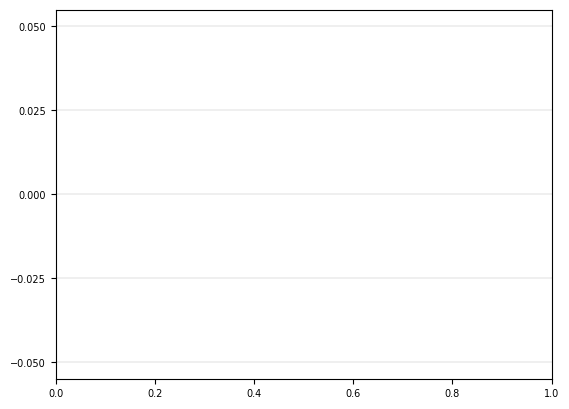

In [3]:
mpl.__version__
mpl.rcParams.update({'font.size': 7})
mpl.rcParams['axes.grid'] = True
mpl.rcParams.update({'axes.grid.axis':'y','grid.color':'#949494','grid.linewidth':0.2})
plt.locator_params(axis='y', nbins=5)   # y-axis
mpl.rcParams['lines.linewidth'] = 1

# price of energy in BAU
pe_bar = 166.5

# Figure 3 Optimal Policy in the OECD

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


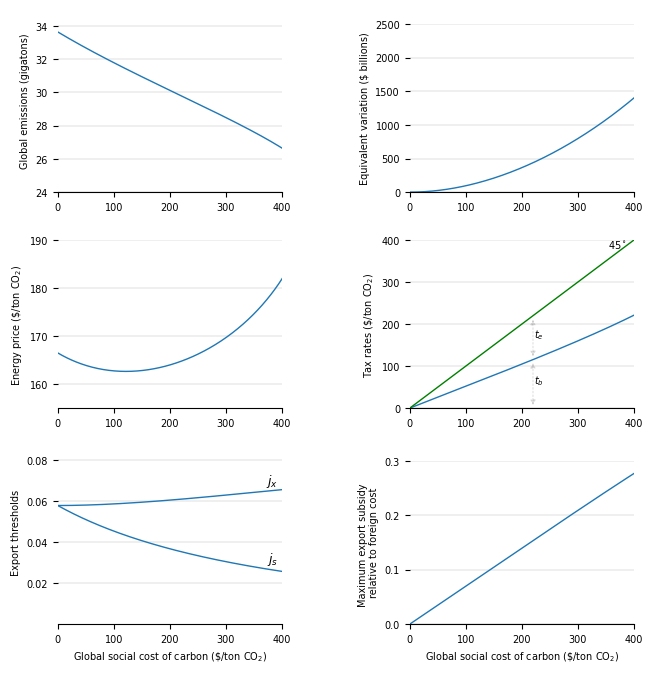

In [3]:

################################################################################
df = pd.read_csv(data_root + 'direct_consumption_opt.csv')
Qeworld_bar = df['Qeworld'].iat[0]
df['eff_te']=df['te']-df['tb']
df['Qeworld_ratio'] = df['Qeworld'] / Qeworld_bar * 100

# estimated cost of a gigaton of carbon, in billions of USD
carbon_cost = 166.5
df['global_scc'] = df['varphi'] * carbon_cost
df['scaled_pe'] = df['pe'] 
df['scaled_tb'] = df['tb']

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
width = 0.35
height = 0.35
x0 = 0.1
y0 = 0.7
xwidth = width + 0.2
yheight = height + 0.1
# transpose the figures
ax1.set_position([x0, y0, width, height+0.031])
ax4.set_position([x0 + xwidth, y0, width, height])
ax2.set_position([x0, y0 - yheight, width, height])
ax5.set_position([x0+ xwidth, y0 - yheight, width, height])
ax3.set_position([x0 , y0 - 2 * yheight, width, height+0.034])
ax6.set_position([x0 + xwidth, y0 - 2 * yheight, width, height-0.01])

x = 'varphi'


for ax in fig.get_axes():
    ax.set_xlim(0,400)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    

df1=df[(df['tax_sce']=='Unilateral') & (df['regionbase']=='OECD37 as Home')]
l1,=ax1.plot(df1[x],df1['Qeworld'], color='C0',linewidth=1)
ax2.plot(df1[x],df1['pe'], color='C0',linewidth=1)
ax3.plot(df1[x],df1['jx'], color='C0',linewidth=1)
ax3.plot(df1[x], df1['js'], color = 'C0', linewidth = 1)
ax4.plot(df1[x],df1['welfare'], color='C0',linewidth=1)
ax5.plot(df1[x],df1['tb'], color='C0',linewidth=1, linestyle = '-')
ax5.plot(df1[x],df1[x], color='green',linewidth=1)
ax6.plot(df1[x],df1['subsidy_ratio'], color='C0',linewidth=1)

ax5.annotate('', xy=(220, 115), xytext=(220, 0), arrowprops=dict(arrowstyle='<|-|>', linestyle=':', color='black', lw=1, alpha=0.1))
ax5.annotate('', xy=(220, 218), xytext=(220, 116), arrowprops=dict(arrowstyle='<|-|>', linestyle=':', color='black', lw=1, alpha=0.1))

ax5.text(388, 375, '45$^\circ$', verticalalignment='bottom', horizontalalignment='right')
ax5.text(240, 159, '$t_e$', verticalalignment='bottom', horizontalalignment='right')
ax5.text(240, 50, '$t_b$', verticalalignment='bottom', horizontalalignment='right')
ax3.text(393, 0.066, '$j_x$', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
ax3.text(393, 0.028, '$j_s$', verticalalignment='bottom', horizontalalignment='right', fontsize=9)


ax3.set_xlabel('Global social cost of carbon (\$/ton CO$_{2}$)')
ax6.set_xlabel('Global social cost of carbon (\$/ton CO$_{2}$)')
ax1.set_ylabel('Global emissions (gigatons)')
ax2.set_ylabel('Energy price (\$/ton CO$_{2}$)')
ax3.set_ylabel('Export thresholds')
ax4.set_ylabel('Equivalent variation ($ billions)')
ax5.set_ylabel('Tax rates (\$/ton CO$_{2}$)')
ax6.set_ylabel('Maximum export subsidy \nrelative to foreign cost')

ax1.set_ylim(24,35)
ax2.set_ylim(155, 190)
ax3.set_ylim(0, 0.09)
ax4.set_ylim(0, 2500)
ax5.set_ylim(0, 400)
ax6.set_ylim(0, 0.3)

ax1.set_yticks([24,26,28,30,32,34])
ax2.set_yticks([160,170,180,190])
ax3.set_yticks([0.02, 0.04 ,0.06, 0.08])
ax4.set_yticks([0,500,1000, 1500, 2000, 2500])
ax5.set_yticks([0,100,200,300,400])
ax6.set_yticks([0,0.1,0.2,0.3])



plt.savefig(plot_root + 'Optimal_policy_one_elasticity_alternate.eps', format='eps', bbox_inches='tight')
plt.savefig(plot_root+ 'Optimal_policy_one_elasticity_alternate.pdf', format='PDF', bbox_inches='tight')

# Figure 4 Optimal Policy in the OECD- contrasting rho in Fig 3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


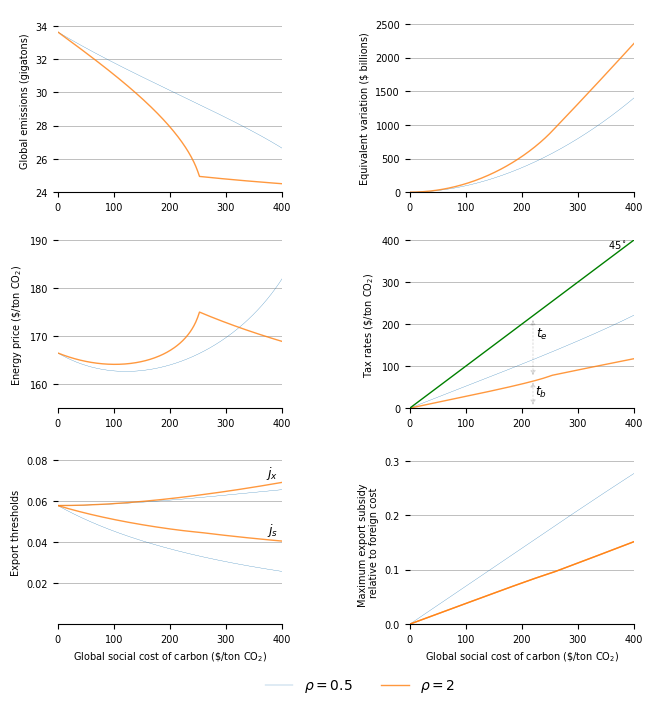

In [10]:
# Adjusted Code for Matching Plot

df = pd.read_csv(data_root + 'direct_consumption_opt.csv')
dff = pd.read_csv(data_root + 'direct_consumption_opt_high_rho.csv')
Qeworld_bar = df['Qeworld'].iat[0]
df['eff_te'] = df['te'] - df['tb']
dff['eff_te'] = dff['te'] - dff['tb']
df['Qeworld_ratio'] = df['Qeworld'] / Qeworld_bar * 100
dff['Qeworld_ratio'] = dff['Qeworld'] / Qeworld_bar * 100

# estimated cost of a gigaton of carbon, in billions of USD
carbon_cost = 166.5
df['global_scc'] = df['varphi'] * carbon_cost
dff['global_scc'] = dff['varphi'] * carbon_cost
df['scaled_pe'] = df['pe'] 
dff['scaled_pe'] = dff['pe']
df['scaled_tb'] = df['tb']
dff['scaled_tb'] = dff['tb'] 


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
width = 0.35
height = 0.35
x0 = 0.1
y0 = 0.7
xwidth = width + 0.2
yheight = height + 0.1
# transpose the figures
ax1.set_position([x0, y0, width, height+0.031])
ax4.set_position([x0 + xwidth, y0, width, height])
ax2.set_position([x0, y0 - yheight, width, height])
ax5.set_position([x0+ xwidth, y0 - yheight, width, height])
ax3.set_position([x0 , y0 - 2 * yheight, width, height+0.034])
ax6.set_position([x0 + xwidth, y0 - 2 * yheight, width, height-0.01])



x = 'varphi'


for ax in fig.get_axes():
    ax.set_xlim(0,400)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.grid(True, axis= 'y', linestyle='-', linewidth=0.5, color='grey', alpha=0.7)
    

df1=df[(df['tax_sce']=='Unilateral') & (df['regionbase']=='OECD37 as Home')]
l1,=ax1.plot(df1[x],df1['Qeworld'], color='C0',linewidth=0.2)
ax2.plot(df1[x],df1['pe'], color='C0',linewidth=0.2)
ax3.plot(df1[x],df1['jx'], color='C0',linewidth=0.2)
ax3.plot(df1[x], df1['js'], color = 'C0', linewidth = 0.2)
ax4.plot(df1[x],df1['welfare'], color='C0',linewidth=0.2)
ax5.plot(df1[x],df1['tb'], color='C0',linewidth=0.2)
ax6.plot(df1[x],df1['subsidy_ratio'], color='C0',linewidth=0.2)

ax5.annotate('', xy=(220, 70), xytext=(220, 0), arrowprops=dict(arrowstyle='<|-|>', linestyle=':', color='black', lw=1, alpha=0.1))
ax5.annotate('', xy=(220, 70), xytext=(220, 218), arrowprops=dict(arrowstyle='<|-|>', linestyle=':', color='black', lw=1, alpha=0.1))

ax5.text(388, 375, '45$^\circ$', verticalalignment='bottom', horizontalalignment='right')
ax5.text(246, 160, '$t_e$', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
ax5.text(246, 20, '$t_b$', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
ax3.text(393, 0.07, '$j_x$', verticalalignment='bottom', horizontalalignment='right', fontsize=9)
ax3.text(393, 0.042, '$j_s$', verticalalignment='bottom', horizontalalignment='right', fontsize=9)


style='solid'
df1=dff[(dff['tax_sce']=='Unilateral') & (dff['regionbase']=='OECD37 as Home')]
l2,=ax1.plot(df1[x],df1['Qeworld'], color='C1',linewidth=1,linestyle=style, alpha=0.8)
ax2.plot(df1[x],df1['pe'], color='C1',linewidth=1,linestyle=style, alpha=0.8)
ax3.plot(df1[x],df1['jx'], color='C1',linewidth=1,linestyle=style, alpha=0.8)
ax3.plot(df1[x],df1['js'], color='C1',linewidth=1,linestyle=style, alpha=0.8)
ax4.plot(df1[x],df1['welfare'], color='C1',linewidth=1,linestyle=style, alpha=0.8)
ax5.plot(df1[x],df1['tb'], color='C1',linewidth=1,linestyle=style, alpha=0.8) 
#ax5.plot(df1[x],df1[x], color='C1',linewidth=1)
#ax5.plot(df1[x],df1['eff_te'], color='C1',linewidth=0.5,linestyle='dashdot')
ax6.plot(df1[x],df1['subsidy_ratio'], color='C1',linewidth=1,linestyle=style, alpha=0.8)

ax3.set_xlabel('Global social cost of carbon (\$/ton CO$_{2}$)')
ax6.set_xlabel('Global social cost of carbon (\$/ton CO$_{2}$)')
ax1.set_ylabel('Global emissions (gigatons)')
ax2.set_ylabel('Energy price (\$/ton CO$_{2}$)')
ax3.set_ylabel('Export thresholds')
ax4.set_ylabel('Equivalent variation ($ billions)')
ax5.set_ylabel( 'Tax rates (\$/ton CO$_{2}$)')
ax6.set_ylabel('Maximum export subsidy \nrelative to foreign cost')

ax1.set_ylim(24,35)
ax2.set_ylim(155, 190)
ax3.set_ylim(0, 0.09)
ax4.set_ylim(0, 2500)
ax5.set_ylim(0, 400)
ax6.set_ylim(0, 0.3)

ax1.set_yticks([24,26,28,30,32,34])
ax2.set_yticks([160,170,180,190])
ax3.set_yticks([0.02, 0.04 ,0.06, 0.08])
ax4.set_yticks([0,500,1000, 1500, 2000, 2500])
ax5.set_yticks([0,100,200,300,400])
ax6.set_yticks([0,0.1,0.2,0.3])
 
# 45-degree line in the Tax Rates plot (ax4)
ax5.plot(df1[x], df1[x], color='green', linewidth=1)
ax6.plot(df1[x], df1['subsidy_ratio'], color='C1', linewidth=1, linestyle=style, alpha=0.8)

# Legend adjustments
ax6.legend(handles=[l1, l2], labels=[r"$\rho=0.5$", r"$\rho=2$"], loc='upper left', bbox_to_anchor=(-0.7, -0.25), fancybox=True, shadow=False, ncol=4, frameon=False, fontsize=10)

plt.savefig(plot_root + 'Optimal_policy_various_elasticities_contrast_rho.eps', format='eps', bbox_inches='tight')
plt.savefig(plot_root + 'Optimal_policy_various_elasticities_contrast_rho.pdf', format='PDF', bbox_inches='tight')

# Figure 5 Coalition Size- One PPF with all taxes

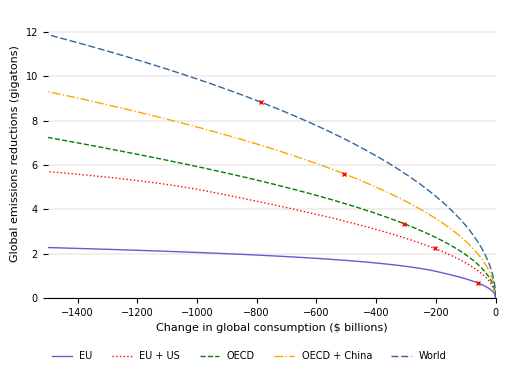

In [8]:
##############################################################################################
# Fig 2.1.5: one PPF with a single elasticity (World, EU, EU + US, OECD, OECD + China) #
#############################################################################################

fig, ax1 = plt.subplots(1, 1)

ax1.set_position([0.52, 0.32, 0.5, 0.6])  
plt.subplots_adjust(left=0.2, right=0.9, top=0.8, bottom=0.2)


ax1.set_xlim(-1500, 0)
ax1.set_ylim(0, 13)
ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(True)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(False)
ax1.set_xlabel('Change in global consumption ($ billions)',fontsize=8)

df = pd.read_csv(data_root + 'direct_consumption_opt.csv')  # elasticity (0.5,0.5)
df1 = pd.read_csv(data_root + 'direct_consumption_global.csv')
df = pd.concat([df, df1], ignore_index=True)

# Retrieve BAU world extraction at varphi = 0
Qeworld = df['Qeworld'].iat[0]
df['Qeworld_chg'] = -(df['Qeworld'] - Qeworld)
xdot_coord = 190

# EU
df1 = df[(df['tax_sce'] == 'Unilateral') & (df['regionbase'] == 'EU28 as Home')]
l1, = ax1.plot(df1['welfare_noexternality'], df1['Qeworld_chg'], linestyle='solid', color='#6A5ACD')
dot = df1[df1['varphi'] == xdot_coord]  # puretp
ax1.plot(dot['welfare_noexternality'], dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point')

# EU/US
df2 = df[(df['tax_sce'] == 'Unilateral') & (df['regionbase'] == 'US and EU as Home')]
l2, = ax1.plot(df2['welfare_noexternality'], df2['Qeworld_chg'], linestyle='dotted', color='red')
dot = df2[df2['varphi'] == xdot_coord]  # puretp
ax1.plot(dot['welfare_noexternality'], dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point')

# OECD
df3 = df[(df['tax_sce'] == 'Unilateral') & (df['regionbase'] == 'OECD37 as Home')]
l3, = ax1.plot(df3['welfare_noexternality'], df3['Qeworld_chg'], linestyle='dashed', color='green')
dot = df3[df3['varphi'] == xdot_coord]  # puretp
ax1.plot(dot['welfare_noexternality'], dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point')

# OECD/China
df4 = df[(df['tax_sce'] == 'Unilateral') & (df['regionbase'] == 'OECD and China as Home')]
l4, = ax1.plot(df4['welfare_noexternality'], df4['Qeworld_chg'], linestyle='dashdot', color = 'orange')
dot = df4[df4['varphi'] == xdot_coord]  # puretp
ax1.plot(dot['welfare_noexternality'], dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point')

# World
df5 = df[(df['tax_sce'] == 'global')]
l5, = ax1.plot(df5['welfare_noexternality'], df5['Qeworld_chg'], linestyle='dashed', dashes=(5, 2), color='#336699')
dot = df5[df5['varphi'] == xdot_coord]
ax1.plot(dot['welfare_noexternality'], dot['Qeworld_chg'], marker='x', markersize=3, color='red', label='point')

ax1.set_ylabel('Global emissions reductions (gigatons)', fontsize=8)

ax1.legend(handles=[l1, l2, l3, l4, l5], labels=['EU', 'EU + US', 'OECD','OECD + China', 'World'],
           loc='lower center', bbox_to_anchor=(0.45, -0.25), fancybox=True, shadow=False, ncol=5,
           frameon=False)

plt.savefig(plot_root + 'homes_5.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)
plt.savefig(plot_root + 'homes_5.eps', format='eps', bbox_inches='tight', pad_inches=0.0)


# Figure 6 One PPF with all Taxes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


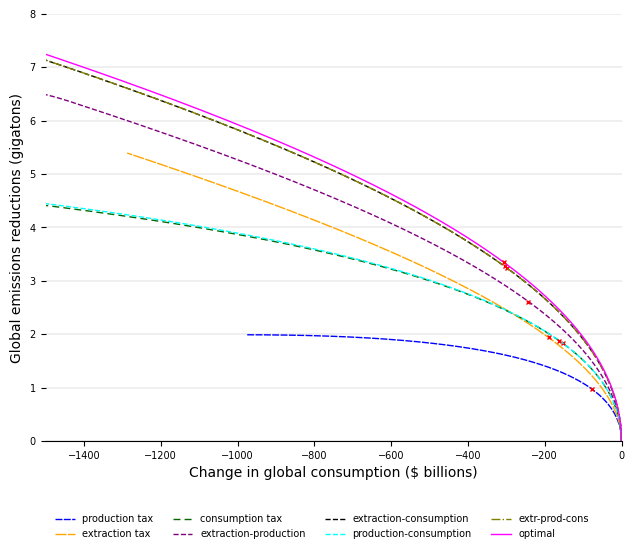

In [9]:
data_root = '/Users/vk365/Dropbox/Optimal-Unilateral-Carbon-Policy/cluster/output_final/'
fig, ax1 = plt.subplots(1, 1)

ax1.set_position([0.52, 0.32, 0.5, 0.6])  
plt.subplots_adjust(left=0.3, right=1.2, top=0.99, bottom=0.1)

df1 = pd.read_csv(data_root + 'direct_consumption_opt.csv')
df1_constrained = pd.read_csv(data_root + 'direct_consumption_constrained.csv')
df1 = pd.concat([df1,df1_constrained], ignore_index = True)

xdot_coord = 190

df = df1
ax1.set_xlim(-1500,0)
ax1.set_ylim(0,8)
ax1.spines["top"].set_visible(False)    
ax1.spines["bottom"].set_visible(True)    
ax1.spines["right"].set_visible(False)    
ax1.spines["left"].set_visible(False)

Qeworld = df['Qeworld'].iat[0]
df['Qeworld_chg'] = -(df['Qeworld'] - Qeworld)
x = 'welfare_noexternality'
y = 'Qeworld_chg'
df = df[df['regionbase'] == 'OECD37 as Home']
linewidth= 1    
# puretp
df_plot=df[(df['tax_sce']=='puretp')] 
l1, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,1), label = 'production tax', color = 'blue')
dot=df_plot[df_plot['varphi']== xdot_coord]
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

# purete
df_plot=df[(df['tax_sce']=='purete')] 
l2, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (8,1), label = 'extraction tax', color = 'orange')
dot=df_plot[df_plot['varphi']==xdot_coord]
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

# puretc
df_plot=df[(df['tax_sce']=='puretc')] 
l3, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed',dashes = (5,3), label = 'consumption tax', color = 'darkgreen', alpha=0.99)
dot=df_plot[df_plot['varphi']==xdot_coord]
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

# extracion/production
df_plot=df[(df['tax_sce']=='EP_hybrid')] 
l5, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-production', color = 'purple')
dot=df_plot[df_plot['varphi']==xdot_coord] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

# extraction/consumption
df_plot=df[(df['tax_sce']=='EC_hybrid')]
l6, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'extraction-consumption', color = 'black')
dot=df_plot[df_plot['varphi']==xdot_coord] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red')

# Production/Consumption
df_plot=df[(df['tax_sce']=='PC_hybrid')]
l7, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashed', label = 'production-consumption', color = 'cyan')
dot=df_plot[df_plot['varphi']==xdot_coord] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red')


# extraction/production/consumption
df_plot=df[(df['tax_sce']=='EPC_hybrid')]
l8, = ax1.plot(df_plot[x],df_plot[y],linestyle='dashdot', label = 'extr-prod-cons', color = 'olive')
dot=df_plot[df_plot['varphi']==xdot_coord] #puretp
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 

# unilateral optimal
df_plot=df[(df['tax_sce']=='Unilateral')] 
l9, = ax1.plot(df_plot[x],df_plot[y], label = 'optimal', color = 'fuchsia')
dot=df_plot[df_plot['varphi']==xdot_coord] 
ax1.plot(dot[x],dot[y], marker='x', markersize=3, color='red') 


################## Labels ##########################################
xlab = 'Change in global consumption ($ billions)'
ylab = 'Global emissions reductions (gigatons)'
ax1.set_ylabel(ylab, fontsize=10)
ax1.set_xlabel(xlab, fontsize=10)

#labs = ['production tax', 'extraction tax','consumption tax','production-consumption','extraction-production','extraction-consumption','optimal']
labs = ['production tax', 'extraction tax', 'consumption tax', 'extraction-production', 'extraction-consumption' , 'production-consumption', 'extr-prod-cons', 'optimal']
ax1.legend(handles = [l1,l2,l3, l5, l6,l7, l8, l9] , labels= labs, 
           loc='lower center', bbox_to_anchor=(0.48, -0.25),fancybox=True, shadow=False, ncol=4, frameon=False)

#plt.savefig(plot_root + 'temp.pdf', format='pdf', bbox_inches = 'tight')
plt.savefig(plot_root +'PPF_taxes_baseline6_3000.eps', format='eps', bbox_inches = 'tight', pad_inches = 0.0)
plt.savefig(plot_root +'PPF_taxes_baseline6_3000.pdf', format='pdf', bbox_inches = 'tight', pad_inches = 0.0)

# Figure 7 Effect of Different Taxes on Emissions

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


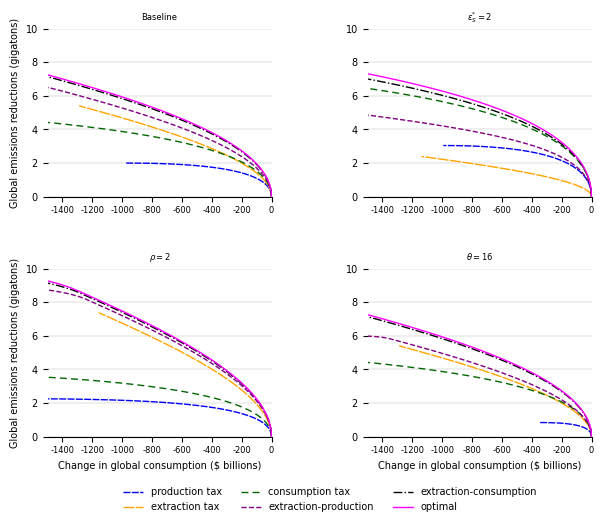

In [5]:
 
#now making these not as a % of BAU but rather as direct emissions reductions in gigatons.

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2)
ax1.set_position([.1, .65, .35, .35])
ax2.set_position([.6, .65, .35, .35])
ax3.set_position([.1, .15, .35, .35])
ax4.set_position([.6, .15, .35, .35])

# Load baseline and constrained data
df1 = pd.read_csv(data_root + 'direct_consumption_opt.csv')
df1_constrained = pd.read_csv(data_root + 'direct_consumption_constrained.csv')
df1 = pd.concat([df1, df1_constrained], ignore_index=True)

# Load high eps data
df2 = pd.read_csv(data_root + 'direct_consumption_higheps_opt.csv')
df2_constrained = pd.read_csv(data_root + 'direct_consumption_higheps_constrained.csv')
df2 = pd.concat([df2, df2_constrained], ignore_index=True)

# Load high rho data (baseline perturbed for high rho)
df3 = pd.read_csv(data_root + 'direct_consumption_opt_high_rho.csv')
df3_constrained = pd.read_csv(data_root + 'direct_consumption_constrained_high_rho.csv')
df3 = pd.concat([df3, df3_constrained], ignore_index=True)

# Load high theta data (baseline perturbed for high theta)
df4 = pd.read_csv(data_root + 'direct_consumption_opt_high_theta.csv')
df4_constrained = pd.read_csv(data_root + 'direct_consumption_constrained_high_theta.csv')
df4 = pd.concat([df4, df4_constrained], ignore_index=True)

Qeworld_bar = df1['Qeworld'].iat[0]
xdot_coord = 190

# Plotting Logic
i = 0
for ax, df in zip([ax1, ax2, ax3, ax4], [df1, df2, df3, df4]):
    ax.set_xlim(-1500, 0)  # -1500
    ax.set_ylim(0, 10)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    x = 'welfare_noexternality'
    y = 'Qeworld_chg'
    df = df[df['regionbase'] == 'OECD37 as Home']

    # puretp
    df_plot = df[(df['tax_sce'] == 'puretp')]
    df_plot['Qeworld_chg'] = -(df_plot['Qeworld'] - Qeworld_bar)  
    l1, = ax.plot(df_plot[x], df_plot[y], linestyle='dashed', dashes=(5, 1), label='production tax', color='blue')
    dot = df_plot[df_plot['varphi'] == xdot_coord]
    #ax.plot(dot[x], dot[y], marker='x', markersize=3, color='red')

    # purete
    df_plot = df[(df['tax_sce'] == 'purete')]
    df_plot['Qeworld_chg'] = -(df_plot['Qeworld'] - Qeworld_bar)  
    l2, = ax.plot(df_plot[x], df_plot[y], linestyle='dashed', dashes=(8, 1), label='extraction tax', color='orange')
    dot = df_plot[df_plot['varphi'] == xdot_coord]
    #ax.plot(dot[x], dot[y], marker='x', markersize=3, color='red')

    # puretc
    df_plot = df[(df['tax_sce'] == 'puretc')]
    df_plot['Qeworld_chg'] = -(df_plot['Qeworld'] - Qeworld_bar)  
    l3, = ax.plot(df_plot[x], df_plot[y], linestyle='dashed', dashes=(5, 3), label='consumption tax', color='darkgreen', alpha=0.99)
    dot = df_plot[df_plot['varphi'] == xdot_coord]
    #ax.plot(dot[x], dot[y], marker='x', markersize=3, color='red')

    # extracion/production
    df_plot = df[(df['tax_sce'] == 'EP_hybrid')]
    df_plot['Qeworld_chg'] = -(df_plot['Qeworld'] - Qeworld_bar)  
    l5, = ax.plot(df_plot[x], df_plot[y], linestyle='dashed', label='extraction-production', color='purple')
    dot = df_plot[df_plot['varphi'] == xdot_coord]
    #ax.plot(dot[x], dot[y], marker='x', markersize=3, color='red')

    # extraction/consumption
    df_plot = df[(df['tax_sce'] == 'EC_hybrid')]
    df_plot['Qeworld_chg'] = -(df_plot['Qeworld'] - Qeworld_bar)  
    dot = df_plot[df_plot['varphi'] == xdot_coord]
    l6, = ax.plot(df_plot[x], df_plot[y], linestyle='dashdot', label='extraction-consumption', color='black')

    # unilateral optimal
    df_plot = df[(df['tax_sce'] == 'Unilateral')]
    df_plot['Qeworld_chg'] = -(df_plot['Qeworld'] - Qeworld_bar)  
    l7, = ax.plot(df_plot[x], df_plot[y], label='optimal', color='fuchsia')
    dot = df_plot[df_plot['varphi'] == xdot_coord]
    #ax.plot(dot[x], dot[y], marker='x', markersize=3, color='red')

    ax.set_xticks([-1400,-1200, -1000,-800,-600,-400, -200, 0])
    ax.set_xticklabels(['-1400', '-1200', '-1000', '-800', '-600', '-400', '-200', '0'], fontsize=6)

    i += 1

################## Labels ##########################################
xlab = 'Change in global consumption ($ billions)'
ylab = 'Global emissions reductions (gigatons)'
ax1.set_ylabel(ylab)
#ax2.set_ylabel(ylab)
ax3.set_ylabel(ylab)
#ax2.set_xlabel(xlab)
ax1.set_title(r"Baseline", fontsize=6)
ax2.set_title(r"$\epsilon_S^{*} = 2$", fontsize=6)
ax3.set_xlabel(xlab)
ax4.set_xlabel(xlab)
ax3.set_title(r"$\rho = 2$", fontsize=6)
ax4.set_title(r"$\theta = 16$", fontsize=6)

labs = ['production tax', 'extraction tax', 'consumption tax', 'extraction-production', 'extraction-consumption', 'optimal']
ax3.legend(handles=[l1, l2, l3, l5, l6, l7], labels=labs,
           loc='upper left', bbox_to_anchor=(0.3, -0.25), fancybox=True, shadow=False, ncol=3, frameon=False)

plt.savefig(plot_root + 'Figure5_new.eps', format='eps', bbox_inches='tight', pad_inches=0.0)
plt.savefig(plot_root + 'Figure5_new.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

# Figure 8 Details on Effect of Various Policies

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


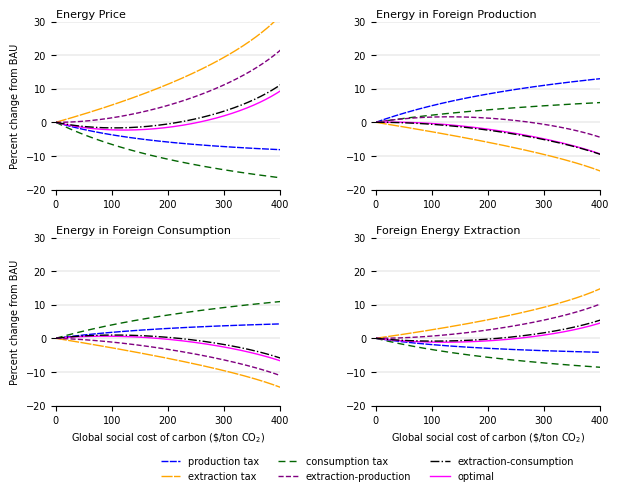

In [7]:
data_root = '/Users/vk365/Dropbox/Optimal-Unilateral-Carbon-Policy/cluster/output_final/'
##############################################################################
########### Alternative Fig 7: location effects ##############################
##############################################################################
df = pd.read_csv(data_root + 'direct_consumption_constrained.csv')
df1 = pd.read_csv(data_root + 'direct_consumption_opt.csv')
df = pd.concat([df, df1], ignore_index=True)
df = df[df['regionbase'] == 'OECD37 as Home']
#df = pd.read_csv(data_root + 'output_sig0/ces0.csv')
df['scaled_pe'] = df['pe']
Qestar=df['Qestar'][0]    #BAU values
Qeworld=df['Qeworld'][0]
Cestar=df['Ceystar'][0]+df['Cex'][0] + df['Cedstar'][0]
Gestar=df['Cem'][0]+df['Ceystar'][0] + df['Cedstar'][0]
pe=df['pe'][0]
df['chg_extraction']= (df['Qestar'] - Qestar)/Qestar*100  #change from absolute change to percent change
df['chg_production']= (df['Cem'] + df['Ceystar'] + df['Cedstar'] - Gestar)/Gestar*100
df['chg_consumption']=(df['Ceystar'] + df['Cex'] + df['Cedstar'] - Cestar)/Cestar*100

df['pe_chg']=(df['pe'] - pe) /pe*100

Qeworld_bar = df1['Qeworld'].iat[0]
Qeworld = df['Qeworld'].iat[0]
df['chg_Qeworld'] = -(df['Qeworld'] - Qeworld)


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)  #(ax5, ax6)
ax1.set_position([.1, .6, .35, .35])
ax2.set_position([.6, .6, .35, .35])
ax3.set_position([.1, .15, .35, .35])
ax4.set_position([.6, .15, .35, .35])
#ax5.set_position([.1, -0.3, .35, .35])
#ax6.set_position([.6, -0.3, .35, .35])


for ax in fig.get_axes():
    ax.set_xlim(0,400)
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(True)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.locator_params(axis='y', nbins=5)   # y-axis
    ax.locator_params(axis='x', nbins=5)   # y-axis

ax4.set_xlabel('Global social cost of carbon (\$/ton CO$_{2}$)')
ax3.set_xlabel('Global social cost of carbon (\$/ton CO$_{2}$)')
ax1.set_ylabel('Percent change from BAU')
ax3.set_ylabel('Percent change from BAU')
ax5.set_ylabel('gigatons')
ax6.set_ylabel('$ billions')

linewidth=0.1
#
df1=df[(df['tax_sce']=='purete')]
l2, = ax4.plot(df1['varphi'],df1['chg_extraction'],linestyle='dashed',dashes = (8,1), color = 'orange')
ax2.plot(df1['varphi'],df1['chg_production'],linestyle='dashed',dashes = (8,1), color = 'orange')
ax3.plot(df1['varphi'],df1['chg_consumption'],linestyle='dashed',dashes = (8,1), color = 'orange')
ax1.plot(df1['varphi'],df1['pe_chg'],linestyle='dashed',dashes = (8,1), color = 'orange')
#ax5.plot(df1['varphi'],df1['chg_Qeworld'],linestyle='dashed',dashes = (8,1), color = 'C1')
#ax6.plot(df1['varphi'],df1['welfare_noexternality'],linestyle='dashed',dashes = (8,1), color = 'C1')


#
df2=df[(df['tax_sce']=='puretp')]
l1, = ax4.plot(df2['varphi'],df2['chg_extraction'],linestyle='dashed',dashes = (5,1), color = 'blue')
ax2.plot(df2['varphi'],df2['chg_production'],linestyle='dashed',dashes = (5,1), color = 'blue')
ax3.plot(df2['varphi'],df2['chg_consumption'],linestyle='dashed',dashes = (5,1), color = 'blue')
ax1.plot(df2['varphi'],df2['pe_chg'],linestyle='dashed',dashes = (5,1), color = 'blue')
#ax5.plot(df2['varphi'],df2['chg_Qeworld'],linestyle='dashed',dashes = (5,1), color = 'C0')
#ax6.plot(df2['varphi'],df2['welfare_noexternality'],linestyle='dashed',dashes = (5,1), color = 'C0')


#
df3=df[(df['tax_sce']=='puretc')]
l3, = ax4.plot(df3['varphi'],df3['chg_extraction'],linestyle='dashed',dashes = (5,3), color = 'darkgreen', alpha= 0.99)
ax2.plot(df3['varphi'],df3['chg_production'],linestyle='dashed',dashes = (5,3), color = 'darkgreen', alpha= 0.99)
ax3.plot(df3['varphi'],df3['chg_consumption'],linestyle='dashed',dashes = (5,3), color = 'darkgreen', alpha= 0.99)
ax1.plot(df3['varphi'],df3['pe_chg'],linestyle='dashed',dashes = (5,3), color = 'darkgreen', alpha= 0.99)
#ax5.plot(df3['varphi'],df3['chg_Qeworld'],linestyle='dashed',dashes = (5,3), color = 'C2')
#ax6.plot(df3['varphi'],df3['welfare_noexternality'],linestyle='dashed',dashes = (5,3), color = 'C2')

#
df4=df[(df['tax_sce']=='EP_hybrid')]
l4, = ax4.plot(df4['varphi'],df4['chg_extraction'],linestyle='dashed', color = 'purple')
ax2.plot(df4['varphi'],df4['chg_production'],linestyle='dashed', color = 'purple')
ax3.plot(df4['varphi'],df4['chg_consumption'],linestyle='dashed', color = 'purple')
ax1.plot(df4['varphi'],df4['pe_chg'],linestyle='dashed', color = 'purple')
#ax5.plot(df4['varphi'],df4['chg_Qeworld'],linestyle='dashed', color = 'C4')
#ax6.plot(df4['varphi'],df4['welfare_noexternality'],linestyle='dashed', color = 'C4')

#
df5=df[(df['tax_sce']=='Unilateral')]
l5, = ax4.plot(df5['varphi'],df5['chg_extraction'],color = 'fuchsia')
ax2.plot(df5['varphi'],df5['chg_production'],color = 'fuchsia')
ax3.plot(df5['varphi'],df5['chg_consumption'],color = 'fuchsia')
ax1.plot(df5['varphi'],df5['pe_chg'],color = 'fuchsia')
#ax5.plot(df5['varphi'],df5['chg_Qeworld'],color = 'C6')
#ax6.plot(df5['varphi'],df5['welfare_noexternality'],color = 'C6')

df6=df[(df['tax_sce']=='EC_hybrid')]
l6, = ax4.plot(df6['varphi'],df6['chg_extraction'],linestyle='dashdot', color = 'black')
ax2.plot(df6['varphi'],df6['chg_production'],linestyle='dashdot', color = 'black')
ax3.plot(df6['varphi'],df6['chg_consumption'],linestyle='dashdot', color = 'black')
ax1.plot(df6['varphi'],df6['pe_chg'],linestyle='dashdot', color = 'black')
#ax5.plot(df6['varphi'],df6['chg_Qeworld'],linestyle='dashdot', color = 'C5')
#ax6.plot(df6['varphi'],df6['welfare_noexternality'],linestyle='dashdot', color = 'C5')

ax4.set_title('Foreign Energy Extraction',loc='left',fontsize = 8, pad=3)
ax4.set_ylim(-20,30)
ax4.set_yticks([-20,-10 , 0, 10, 20, 30])
ax2.set_title('Energy in Foreign Production',loc='left',fontsize = 8, pad=3)
ax2.set_ylim(-20,30)
ax2.set_yticks([-20,-10 , 0, 10, 20, 30])
ax3.set_title('Energy in Foreign Consumption',loc='left',fontsize = 8, pad=3)
ax3.set_ylim(-20,30)
ax3.set_yticks([-20,-10 , 0, 10, 20, 30])
ax1.set_title('Energy Price',loc='left',fontsize = 8, pad=3)
ax1.set_ylim(-20,30)
ax1.set_yticks([-20,-10 , 0, 10, 20, 30])
#ax5.set_title('Global Emissions Reductions',loc='left',fontsize = 8, pad=3)
#ax5.set_ylim(0, 8)
#ax4.set_title('Change in Consumption',loc='left',fontsize = 8, pad=3)
#ax6.set_ylim(-1400, 2)
#ax6.set_yticks([-1400, -1200, -1000, -800, -600, -400, -200, 0])




ax4.legend(handles = [l1,l2,l3,l4,l6,l5] , 
            labels=['production tax','extraction tax','consumption tax', 
                    'extraction-production','extraction-consumption','optimal'],
            loc='upper left', bbox_to_anchor=(-1, -0.25),
            fancybox=True, shadow=False, ncol=3, frameon=False)

plt.savefig(plot_root + 'leakage_v2.pdf', format='pdf', bbox_inches='tight')
plt.savefig(plot_root + 'leakage_v2.eps', format='eps', bbox_inches='tight')

# Figure 9 Effect of renewables

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


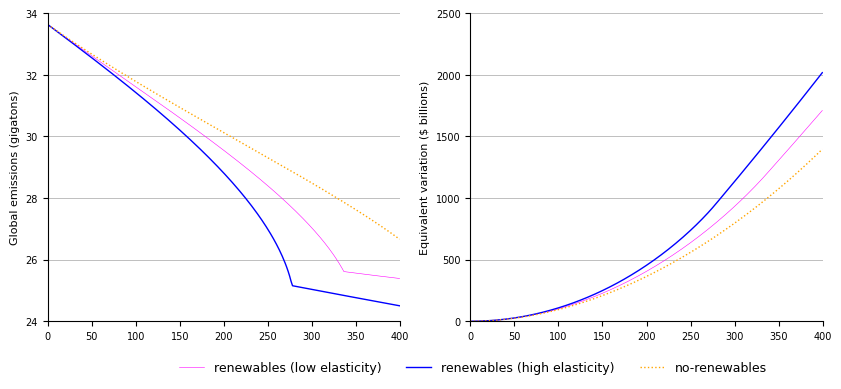

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataframes
data_root1 = '/Users/vk365/Dropbox/Optimal-Unilateral-Carbon-Policy/cluster/output_final/'
df1 = pd.read_csv(data_root1 + 'direct_consumption_renewable.csv')
data_root2 = '/Users/vk365/Dropbox/Optimal-Unilateral-Carbon-Policy/cluster/output_final/'
df2 = pd.read_csv(data_root2 + 'direct_consumption_renewable_high_eps.csv')
df3 = pd.read_csv(data_root1 + 'direct_consumption_opt.csv')

df1 = df1[(df1['regionbase'] == 'OECD37 as Home') & (df1['varphi'] <= 400)]
df2 = df2[(df2['regionbase'] == 'OECD37 as Home') & (df2['varphi'] <= 400)]
df3 = df3[(df3['regionbase'] == 'OECD37 as Home') & (df3['varphi'] <= 400)]

# Preprocessing and adding necessary columns
carbon_cost = 166.5

for df in [df1, df2, df3]:
    df['emissions'] = df['Qe1'] + df['Qe1star']
    df['global_scc'] = df['varphi'] * carbon_cost

# Prepare the plot with just 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Set common properties for axes
for ax in [ax1, ax2]:
    ax.set_xlim(0, 400)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(True, axis='y', linestyle='-', linewidth=0.5, color='grey', alpha=0.7)

x = 'varphi'

# Plot emissions (global) for df1, df2, and df3 with respective color schemes
l1, = ax1.plot(df1[x], df1['emissions'], color='fuchsia', linewidth=0.4, alpha=0.99, label='Renewables Emissions')
l2, = ax1.plot(df2[x], df2['emissions'], color='blue', linewidth=1, linestyle='solid', label=r"Renewables $\epsilon^{*}_2=2$ Emissions")
l3, = ax1.plot(df3[x], df3['emissions'], color='orange', linewidth=1, linestyle='dotted', label='No Renewables Emissions')

# Plot equivalent variation for df1, df2, and df3 with respective color schemes
ax2.plot(df1[x], df1['welfare'], color='fuchsia', linewidth=0.4, alpha=0.99, label='Renewables Welfare')
ax2.plot(df2[x], df2['welfare'], color='blue', linewidth=1, linestyle='solid', label=r"Renewables $\epsilon^{*}_2=2$ Welfare")
ax2.plot(df3[x], df3['welfare'], color='orange', linewidth=1, linestyle='dotted', label='No Renewables Welfare')

# Set labels and titles
#ax1.set_title('Global Emissions (Gigatons)', fontsize=8)
#ax2.set_title('Equivalent Variation', fontsize=8)
ax1.set_ylabel('Global emissions (gigatons)', fontsize=8)
ax2.set_ylabel('Equivalent variation ($ billions)', fontsize=8)
ax1.set_ylim(24, 34)
ax2.set_ylim(0, 2500)

# Set y-ticks for both axes
ax1.set_yticks([24, 26, 28, 30, 32, 34])
ax2.set_yticks([0, 500, 1000, 1500, 2000, 2500])

# Create a global legend below the figure
fig.legend(handles=[l1, l2, l3], labels=['renewables (low elasticity)', r'renewables (high elasticity)', 'no-renewables'], loc='lower center', bbox_to_anchor=(0.55, -0.05), fancybox=True, shadow=False, ncol=3, frameon=False, fontsize = 9)

# Save and show the plot
plt.savefig('renewable_ev.pdf', format='pdf', bbox_inches='tight')
plt.savefig(plot_root + 'renewable_ev.eps', format='eps', bbox_inches='tight', pad_inches=0.0)

plt.show()

# Figure 10

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


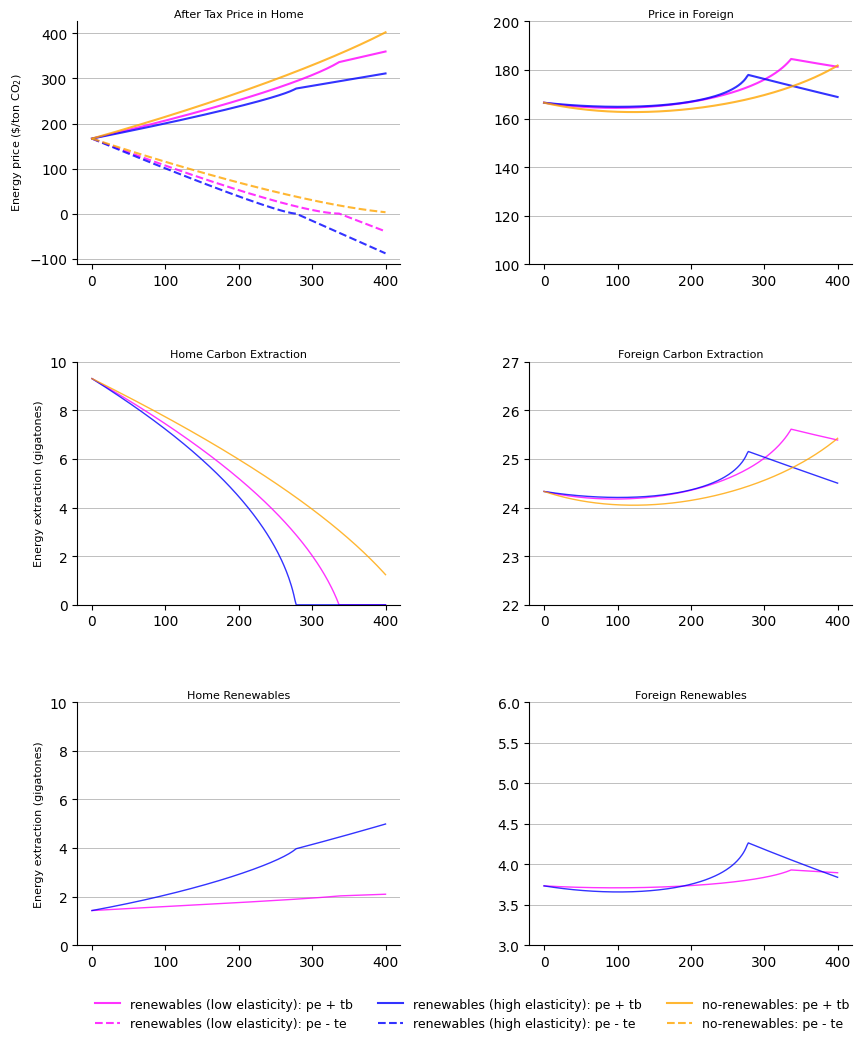

In [3]:
 
 
data_root1 = '/Users/vk365/Dropbox/Optimal-Unilateral-Carbon-Policy/cluster/output_final/'
df1 = pd.read_csv(data_root1 + 'direct_consumption_renewable.csv')
data_root2 = '/Users/vk365/Dropbox/Optimal-Unilateral-Carbon-Policy/cluster/output_final/'
df2 = pd.read_csv(data_root2 + 'direct_consumption_renewable_high_eps.csv')
data_root3 = '/Users/vk365/Dropbox/Optimal-Unilateral-Carbon-Policy/cluster/output_final/'
df3 = pd.read_csv(data_root1 + 'direct_consumption_opt.csv')

df1 = df1[(df1['regionbase'] == 'OECD37 as Home') & (df1['varphi'] <= 400)]
df2 = df2[(df2['regionbase'] == 'OECD37 as Home') & (df2['varphi'] <= 400)]
df3 = df3[(df3['regionbase'] == 'OECD37 as Home') & (df3['varphi'] <= 400)]

# Calculate necessary variables
for df in [df1, df2, df3]:
    df['ext'] = df['varphi'] - df['tb']
    df['pe_minus_te'] = df['pe'] - df['ext']

for df in [df1, df2]:
    df['Home_renewable'] = df['Qe2']
    df['Foreign_renewable'] = df['Qe2star']
    df['Home_carbon'] = df['Qe1']
    df['Foreign_carbon'] = df['Qe1star']

df3['Home_carbon'] = df3['Qe1']
df3['Foreign_carbon'] = df3['Qe1star']

# Prepare the plot with 3 rows and 2 columns
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot pe, pe + tb, pe - te on ax1
for df, label, color in zip([df1, df2, df3], ['renewables (low elasticity):', r'renewables (high elasticity):', 'no-renewables:'], ['fuchsia', 'blue', 'orange']):
    #ax1.plot(df['varphi'], df['pe'], label=f'{label} pe', color=color, linestyle='-', alpha=0.8)
    ax1.plot(df['varphi'], df['pe'] + df['tb'], label=f'{label} pe + tb', color=color, linestyle='-', alpha=0.8)
    ax1.plot(df['varphi'], df['pe_minus_te'], label=f'{label} pe - te', color=color, linestyle='--', alpha=0.8)

ax1.set_title("After Tax Price in Home", fontsize=8, pad=3)
ax1.set_ylabel(" Energy price (\$/ton CO$_{2}$)", fontsize=8)

# Plot pe only on ax2
for df, label, color in zip([df1, df2, df3], ['renewables (low elasticity)', r'renewables (high elasticity)', 'no-renewables'], ['fuchsia', 'blue', 'orange']):
    ax2.plot(df['varphi'], df['pe'], label=label, color=color, linestyle='-', alpha=0.8)

ax2.set_title("Price in Foreign", fontsize=8, pad=3)

# Plot renewables and carbon extraction on other subplots
plot_pairs = [
    ('Home_renewable', ax5, 'Home Renewables'),
    ('Foreign_renewable', ax6, 'Foreign Renewables'),
    ('Home_carbon', ax3, 'Home Carbon Extraction'),
    ('Foreign_carbon', ax4, 'Foreign Carbon Extraction'),
]

for y, ax, title in plot_pairs:
    ax.plot(df1['varphi'], df1[y], label='Renewables', color='fuchsia', linewidth=1, linestyle='-', alpha=0.8)
    ax.plot(df2['varphi'], df2[y], label=r'Renewables $\epsilon^{*}_2=2$', color='blue', linewidth=1, linestyle='-', alpha=0.8)
    if ax in [ax3, ax4]:
        ax.plot(df3['varphi'], df3[y], label='No Renewables', color='orange', linewidth=1, linestyle='-', alpha=0.8)
    ax.set_title(title, fontsize=8, pad=3)

# Set common labels and limits for certain axes
ax5.set_ylabel("Energy extraction (gigatones)", fontsize=8)  
ax3.set_ylabel("Energy extraction (gigatones)", fontsize=8)
ax5.set_ylim(0, 10)
ax4.set_ylim(22, 27)
ax3.set_ylim(0, 10)
ax6.set_ylim(3, 6)
ax2.set_ylim(100, 200)

# Customize grid and spines
for ax in fig.get_axes():
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(True, axis='y', linestyle='-', linewidth=0.5, color='grey', alpha=0.7)

# Create a global legend at the bottom of the figure
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.52, 0.03), fancybox=True, shadow=False, frameon= False,  ncol=3, fontsize=9)

# Save and show the plot
plt.savefig(plot_root + 'energypatternscomp.pdf', format='pdf', bbox_inches='tight')
plt.savefig(plot_root + 'energypatternscomp.eps', format='eps', bbox_inches='tight', pad_inches=0.0)

plt.show()
